In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 

Using TensorFlow backend.


In [2]:
train_data=pd.read_csv('D:\\AI STUDY MATERIAL\\mnist_train.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.shape

(42000, 785)

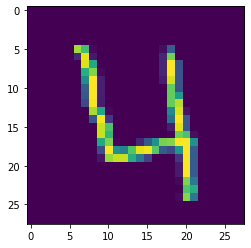

In [16]:
import matplotlib.pyplot as plt
f=train_data.iloc[3,1:].values.reshape(28,28)
plt.imshow(f)

In [19]:
#Storing Pixel array in form length width and channel in df_x
df_x = train_data.iloc[:,1:].values.reshape(len(train_data),28,28,1).astype('float32')

#Storing the labels in y
y = train_data.iloc[:,0].values


In [21]:
import tensorflow.keras.utils as tfk
df_y = tfk.to_categorical(y, num_classes=10, dtype='int64')

In [23]:
df_x.shape

(42000, 28, 28, 1)

In [25]:
df_y.shape

(42000, 10)

In [5]:
from keras.utils import to_categorical
y = to_categorical(y)

In [26]:
X_train,X_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2)

In [27]:
model = Sequential()
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               540900    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)               

In [29]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,verbose=2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
 - 37s - loss: 2.5438 - accuracy: 0.9003 - val_loss: 0.1352 - val_accuracy: 0.9638
Epoch 2/10
 - 34s - loss: 0.1524 - accuracy: 0.9558 - val_loss: 0.1189 - val_accuracy: 0.9681
Epoch 3/10
 - 34s - loss: 0.1203 - accuracy: 0.9643 - val_loss: 0.1136 - val_accuracy: 0.9682
Epoch 4/10
 - 34s - loss: 0.1088 - accuracy: 0.9676 - val_loss: 0.1105 - val_accuracy: 0.9685
Epoch 5/10
 - 34s - loss: 0.1065 - accuracy: 0.9671 - val_loss: 0.1351 - val_accuracy: 0.9668
Epoch 6/10
 - 34s - loss: 0.1059 - accuracy: 0.9678 - val_loss: 0.1305 - val_accuracy: 0.9698
Epoch 7/10
 - 34s - loss: 0.0921 - accuracy: 0.9719 - val_loss: 0.1232 - val_accuracy: 0.9646
Epoch 8/10
 - 34s - loss: 0.0895 - accuracy: 0.9731 - val_loss: 0.1229 - val_accuracy: 0.9714
Epoch 9/10
 - 34s - loss: 0.0952 - accuracy: 0.9732 - val_loss: 0.1427 - val_accuracy: 0.9650
Epoch 10/10
 - 34s - loss: 0.0834 - accuracy: 0.9765 - val_loss: 0.1504 - val_accuracy: 0.9652


In [31]:
model.predict(X_test)

array([[9.9900985e-01, 1.1763976e-09, 6.0468661e-05, ..., 1.5044067e-08,
        1.2698632e-05, 4.7312099e-08],
       [2.9686699e-18, 2.4188796e-15, 1.0093950e-12, ..., 1.0962765e-14,
        6.1153910e-10, 4.7926194e-12],
       [2.4373443e-19, 2.1963535e-19, 9.6398257e-16, ..., 1.4891716e-15,
        3.0408467e-09, 9.9392228e-13],
       ...,
       [1.2278024e-07, 1.2824537e-11, 3.3368489e-10, ..., 1.6811349e-05,
        3.3236779e-12, 9.9998248e-01],
       [1.6481909e-10, 2.3115117e-12, 2.5755307e-09, ..., 1.0000000e+00,
        4.3308791e-08, 8.8431129e-09],
       [7.9157250e-11, 2.1071121e-07, 1.9624378e-09, ..., 1.4529788e-04,
        5.7955476e-06, 6.2872332e-01]], dtype=float32)

In [32]:
model.predict_classes(X_test)

array([0, 3, 3, ..., 9, 7, 9], dtype=int64)

In [35]:
train_data.iloc[100:105:,1:]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
train_data.iloc[50:60:,:1]

,label
50,7
51,5
52,1
53,9
54,0
55,2
56,2
57,3
58,9
59,1


In [38]:
var = train_data.iloc[50:60:,1:].values.reshape(10,28,28,1).astype('float32')

In [40]:
model.predict_classes(var)

array([7, 5, 1, 9, 0, 2, 2, 3, 9, 1], dtype=int64)